In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [74]:
df = pd.read_csv('./advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [76]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [77]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

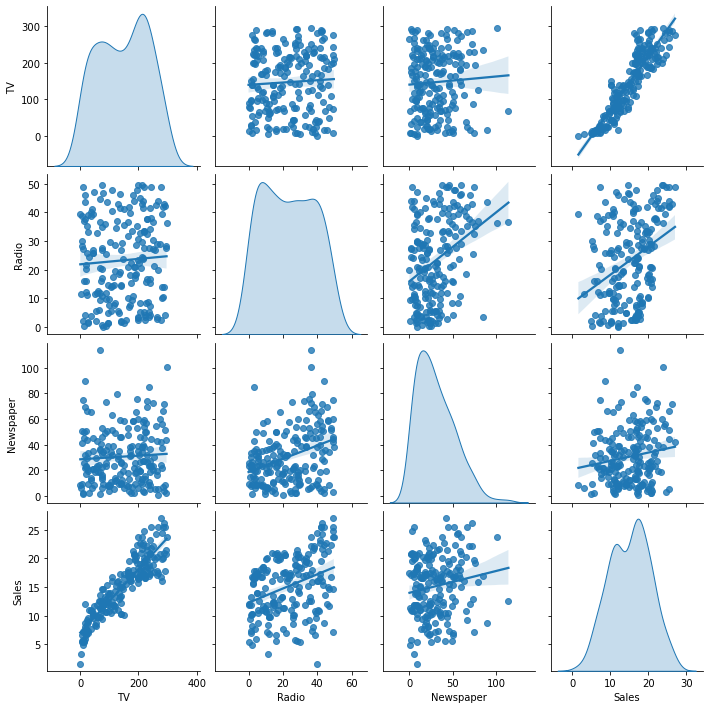

In [78]:
sns.pairplot(data = df, diag_kind="kde", kind="reg")
plt.show()

In [79]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [80]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
print("Model Accuracy:", round(model.score(X_test, y_test) * 100, 2))

Model Accuracy: 90.59


In [107]:
test_sample = X_test.iloc[-1].values.reshape(1,-1)
pred = model.predict(test_sample)

In [109]:
all_data = np.concatenate((test_sample, pred.reshape(1,-1)), axis = 1)

In [112]:
scaled_data = scaler.inverse_transform(all_data)

In [116]:
print("Prediction:", round(scaled_data[0][-1], 2))

Prediction: 6.46
